In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import time

In [2]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from plots import *

In [1]:
import numpy as np
import pandas as pd

true_b = 1
true_w = 2

df = pd.read_csv('C:/Users/MSIS/Downloads/archive (7)/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
split = int(0.8*df.shape[0])
print(f"split = {split}")
X_train = df.iloc[:split, 1]
y_train = df.iloc[:split, 0]

X_test = df.iloc[split:, 1]
y_test = df.iloc[split:, 0]

X_train.shape

split = 436


(436,)

In [93]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (436,)
y_train shape: (436,)
X_test shape: (109,)
y_test shape: (109,)


Text(0, 0.5, 'y')

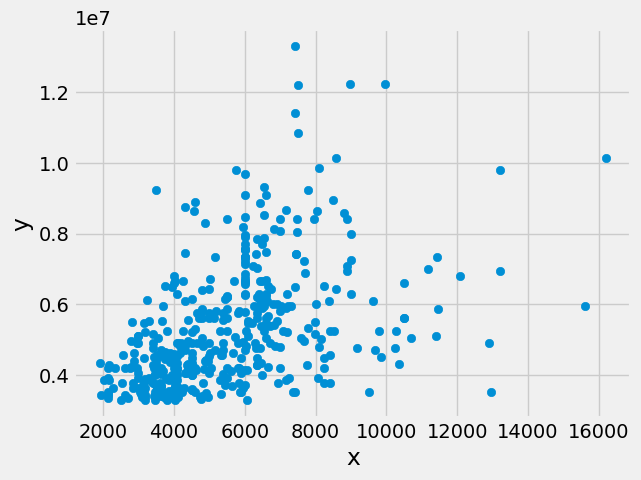

In [95]:
plt.scatter(X_train, y_train)
plt.xlabel('x')
plt.ylabel('y')

In [90]:
df.replace(['yes','no'],[1,0], inplace=True)


In [89]:
df.replace(['furnished','unfurnished','semi-furnished'],[1,0,2],inplace=True)

In [4]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    
    f_wb = w * x + b
    cost = np.sum((f_wb - y) ** 2)
    
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [5]:
import numpy as np

def compute_gradient(x, y, w, b):
    m = x.shape[0]
    
    f_wb = w * x + b
    dj_dw = np.sum((f_wb - y) * x) / m
    dj_db = np.sum(f_wb - y) / m

    return dj_dw, dj_db


In [6]:
import numpy as np
import copy

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = copy.deepcopy(w_in)  # Avoid modifying global w_in
    J_history = []  # An array to store cost J at each iteration for graphing later
    p_history = []  # An array to store parameter [w, b] at each iteration

    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update parameters using the learning rate alpha
        b -= alpha * dj_db
        w -= alpha * dj_dw

        # Save cost J at each iteration
        if i < 100000:  # Prevent resource exhaustion
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % max(1, num_iters // 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]} ",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db}  ",
                  f"w: {w}, b: {b}")

    return w, b, J_history, p_history


In [9]:
# Initialize parameters
w_init = 0
b_init = 0

# Some gradient descent settings
iterations = 15000
tmp_alpha = 1.0e-10

# Run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w, b) found by gradient descent: ({w_final}, {b_final})")


Iteration    0: Cost 15341271474312.148  dj_dw: -30776386479.3578, dj_db: -5277765.9174311925   w: 3.07763864793578, b: 0.0005277765917431192
Iteration 1500: Cost 1893137109392.3152  dj_dw: -160757008.83051783, dj_db: -473939.17939263146   w: 875.5128188391695, b: 0.20472681450270178
Iteration 3000: Cost 1892770162898.0225  dj_dw: -839626.5628649511, dj_db: -448846.9080547036   w: 880.0698777983887, b: 0.2727491272868886
Iteration 4500: Cost 1892770122685.3562  dj_dw: -4315.658162248244, dj_db: -448715.8320174542   w: 880.0936705901296, b: 0.3400601344882448
Iteration 6000: Cost 1892770092483.2908  dj_dw: 47.49670620139586, dj_db: -448715.1380458302   w: 880.0937843633051, b: 0.40736742486636485
Iteration 7500: Cost 1892770062281.4995  dj_dw: 70.28715431143384, dj_db: -448715.1251106237   w: 880.0937744517248, b: 0.47467469443351706
Iteration 9000: Cost 1892770032079.71  dj_dw: 70.40606437473122, dj_db: -448715.11573275574   w: 880.0937638940875, b: 0.5419819624954179
Iteration 10500: 

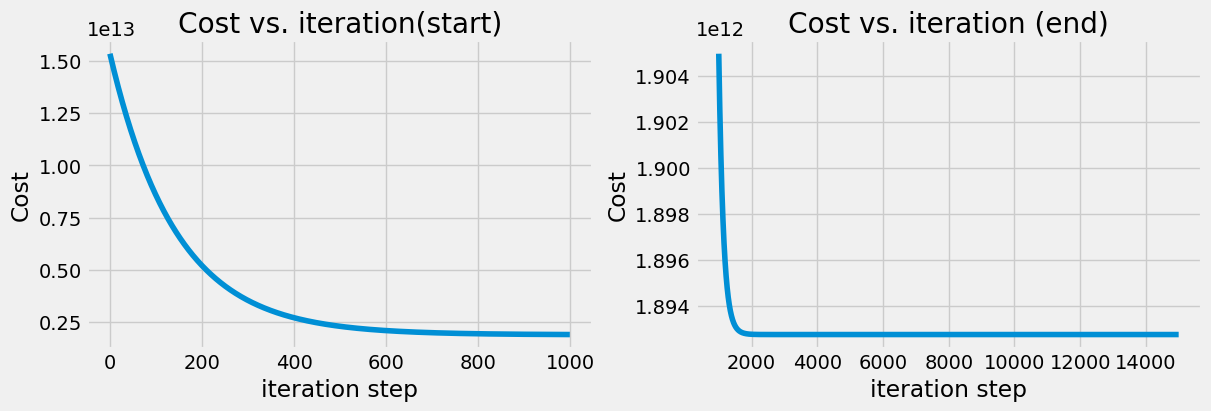

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:1000])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [12]:
predicted = w_final * X_train + b_final


Text(0.5, 0, 'x')

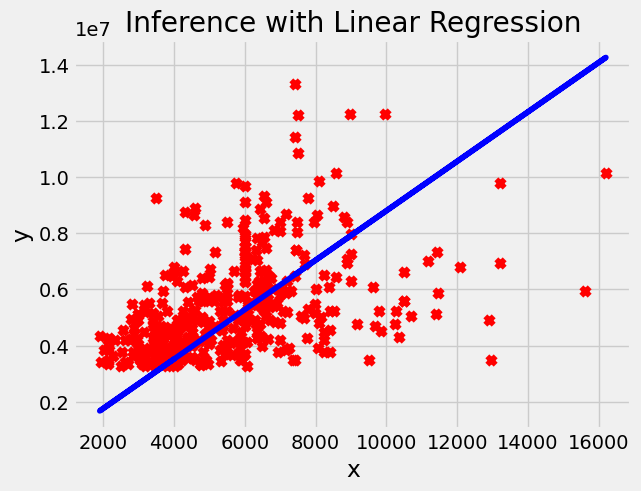

In [13]:
# Plot the linear fit
plt.plot(X_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(X_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Inference with Linear Regression")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')

In [14]:
from sklearn.metrics import r2_score

r2_score(y_train,predicted)

-0.2548047094500203

In [22]:
X_train_new = X_train.values.reshape(-1, 1)  # Convert to NumPy array and reshape X_train
y_train_new = y_train.values.reshape(-1) 
X_test_new = X_test.values.reshape(-1, 1)
y_test_new = y_test.values.reshape(-1)

In [23]:
start_time = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train_new, y_train_new)
lr_predictions = lr_model.predict(X_test_new)
lr_time = time.time() - start_time
lr_r2_score = r2_score(y_test, lr_predictions)

In [24]:
print("scikit-learn LinearRegression:")
print(f"Time taken: {lr_time} seconds")
print(f"R2 Score: {lr_r2_score}")

scikit-learn LinearRegression:
Time taken: 0.0016803741455078125 seconds
R2 Score: -22.627069610862897
